## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

## Data Correlation

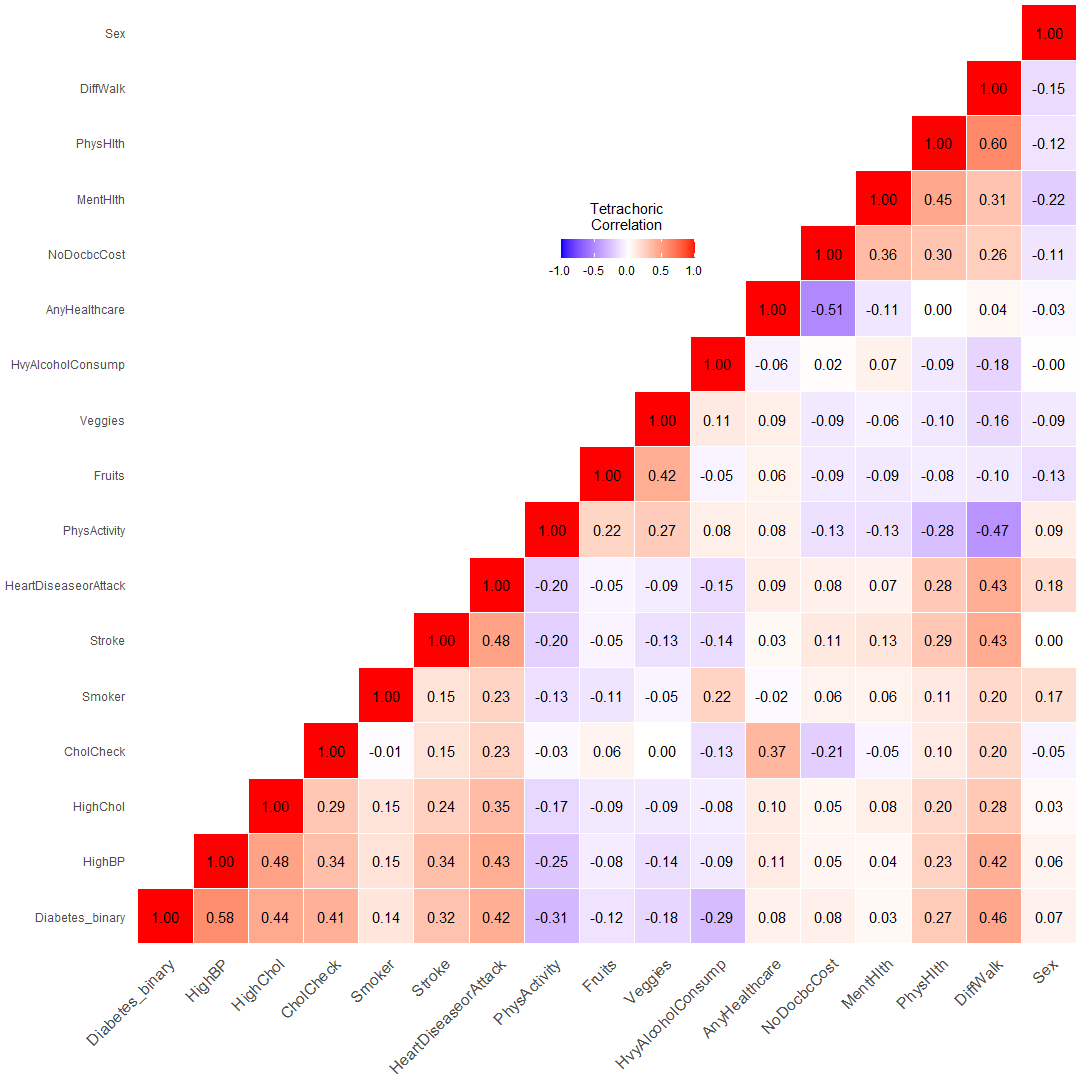

## Dataset importing

In [2]:
cleanDiabetes_df = pd.read_csv("Datasets/Cleaned_Diabetes.csv") 
bmi = cleanDiabetes_df["BMI"]
q1_bmi = bmi.quantile(0.25) 
q3_bmi = bmi.quantile(0.75) 
iqr_bmi = q3_bmi-q1_bmi
diabetes_filtered = cleanDiabetes_df[(cleanDiabetes_df["BMI"] < (q3_bmi + (1.5 * iqr_bmi))) & (cleanDiabetes_df["BMI"] > (q1_bmi - (1.5 * iqr_bmi)))] 


## Checking how some columns affect Diabetes

### High Blood Pressure vs Diabetes

In [3]:
diabetes_vs_bp = diabetes_filtered.groupby(['Diabetes_binary', 'HighBP']).size().reset_index(name = 'Count')
print(diabetes_vs_bp)

diabetes_vs_bp_total = diabetes_vs_bp.groupby(['Diabetes_binary']).sum().Count
diabetes_vs_bp_total

   Diabetes_binary  HighBP  Count
0                0     0.0  21891
1                0     1.0  12850
2                1     0.0   8415
3                1     1.0  24933


Diabetes_binary
0    34741
1    33348
Name: Count, dtype: int64

Text(0.5, 1.0, 'Diabetes Status VS High Blood Pressure')

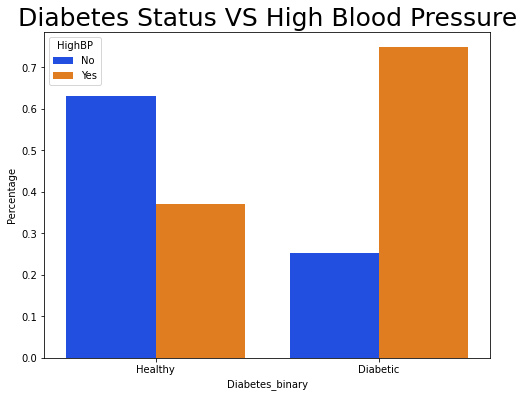

In [4]:
# Diabetes_vs_bp
diabetes_vs_bp_total_stat = diabetes_vs_bp.set_index('Diabetes_binary').join(diabetes_vs_bp_total
                                                                                  ,rsuffix='_')
diabetes_vs_bp_total_stat['Percentage'] = diabetes_vs_bp_total_stat['Count']/diabetes_vs_bp_total_stat['Count_']
diabetes_vs_bp_total_stat = diabetes_vs_bp_total_stat.reset_index()

# Rename and label
diabetes_vs_bp_total_stat['Diabetes_binary'] = diabetes_vs_bp_total_stat['Diabetes_binary'].replace({0.0:'Healthy', 1.0:'Diabetic'})
diabetes_vs_bp_total_stat['HighBP'] = diabetes_vs_bp_total_stat['HighBP'].replace({0.0:'No', 1.0:'Yes'})


#visualize diabetes status ~ BP
plt.figure(figsize = (8,6))
axes = sb.barplot(x = 'Diabetes_binary', y = 'Percentage', hue = 'HighBP', data = diabetes_vs_bp_total_stat, palette = 'bright')
plt.title("Diabetes Status VS High Blood Pressure", fontsize=25)

<b>Conclusion:</b> This graph shows that there is relation between high blood pressure and Diabetes status. If the blood pressure is high, it is more likely the person has diabetes.

### Diabetes vs High Cholesterol

In [5]:
diabetes_vs_chol = diabetes_filtered.groupby(['Diabetes_binary', 'HighChol']).size().reset_index(name = 'Count')
print(diabetes_vs_chol)

diabetes_vs_chol_total = diabetes_vs_chol.groupby(['Diabetes_binary']).sum().Count
diabetes_vs_chol_total

   Diabetes_binary  HighChol  Count
0                0       0.0  21345
1                0       1.0  13396
2                1       0.0  11013
3                1       1.0  22335


Diabetes_binary
0    34741
1    33348
Name: Count, dtype: int64

Text(0.5, 1.0, 'Diabetes Status VS High Cholesterol')

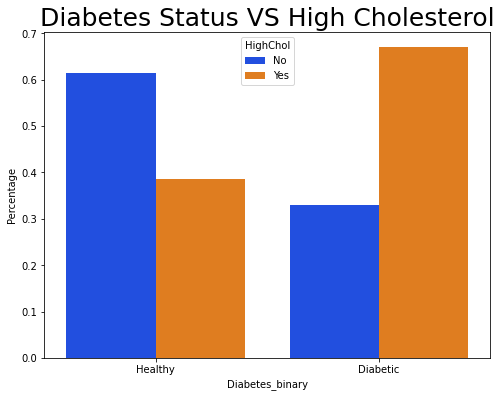

In [6]:
# Diabetes_chol_Total_Stat
diabetes_vs_chol_total_stat = diabetes_vs_chol.set_index('Diabetes_binary').join(diabetes_vs_chol_total
                                                                                  ,rsuffix='_')
diabetes_vs_chol_total_stat['Percentage'] = diabetes_vs_chol_total_stat['Count']/diabetes_vs_chol_total_stat['Count_']
diabetes_vs_chol_total_stat = diabetes_vs_chol_total_stat.reset_index()

# Rename and label
diabetes_vs_chol_total_stat['Diabetes_binary'] = diabetes_vs_chol_total_stat['Diabetes_binary'].replace({0.0:'Healthy', 1.0:'Diabetic'})
diabetes_vs_chol_total_stat['HighChol'] = diabetes_vs_chol_total_stat['HighChol'].replace({0.0:'No', 1.0:'Yes'})


#visualize diabetes status ~ BP
plt.figure(figsize = (8,6))
axes = sb.barplot(x = 'Diabetes_binary', y = 'Percentage', hue = 'HighChol', data = diabetes_vs_chol_total_stat, palette = 'bright')
plt.title("Diabetes Status VS High Cholesterol", fontsize=25)


<b>Conclusion:</b> This graph shows that there is relation between high Cholesterol and Diabetes status. If the cholesterol is high, it is more likely the person has diabetes.

## Heart Disease or Attack vs Diabetes

In [7]:
diabetes_vs_HD = diabetes_filtered.groupby(['Diabetes_binary', 'HeartDiseaseorAttack']).size().reset_index(name = 'Count')
print(diabetes_vs_HD)

diabetes_vs_HD_total = diabetes_vs_HD.groupby(['Diabetes_binary']).sum().Count
diabetes_vs_HD_total

   Diabetes_binary  HeartDiseaseorAttack  Count
0                0                   0.0  32143
1                0                   1.0   2598
2                1                   0.0  25872
3                1                   1.0   7476


Diabetes_binary
0    34741
1    33348
Name: Count, dtype: int64

Text(0.5, 1.0, 'Diabetes Status VS HeartDiseaseOrAttack')

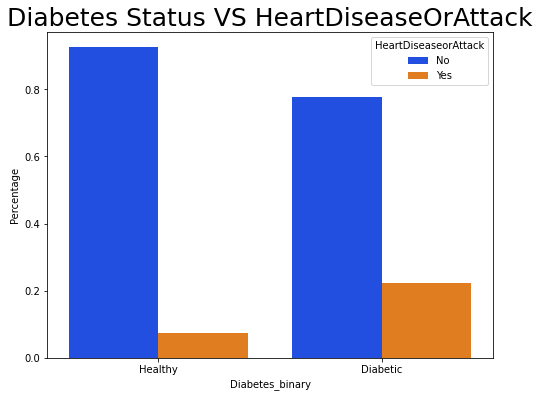

In [8]:
# Diabetes_HD_Total_Stat
diabetes_vs_HD_total_stat = diabetes_vs_HD.set_index('Diabetes_binary').join(diabetes_vs_HD_total
                                                                                  ,rsuffix='_')
diabetes_vs_HD_total_stat['Percentage'] = diabetes_vs_HD_total_stat['Count']/diabetes_vs_HD_total_stat['Count_']
diabetes_vs_HD_total_stat = diabetes_vs_HD_total_stat.reset_index()

# Rename
diabetes_vs_HD_total_stat['Diabetes_binary'] = diabetes_vs_HD_total_stat['Diabetes_binary'].replace({0.0:'Healthy', 1.0:'Diabetic'})
diabetes_vs_HD_total_stat['HeartDiseaseorAttack'] = diabetes_vs_HD_total_stat['HeartDiseaseorAttack'].replace({0.0:'No', 1.0:'Yes'})


#visualize diabetes status ~ BP
plt.figure(figsize = (8,6))
axes = sb.barplot(x = 'Diabetes_binary', y = 'Percentage', hue = 'HeartDiseaseorAttack', data = diabetes_vs_HD_total_stat, palette = 'bright')
plt.title("Diabetes Status VS HeartDiseaseOrAttack", fontsize=25)



<b>Conclusion:</b> This graph shows that there is slight relation between heart disease and Diabetes status. If the person experienced heart disease or attack before, he is more likely to be diabetic and vice versa.